In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
ds_clim = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\tp_aug1979_2017.nc")

# Convert to mm and resample to daily
tp_all = ds_clim['tp'] * 1000
tp_daily_all = tp_all.resample(valid_time='1D').sum()

# Extract Kerala region
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

tp_daily_kerala = tp_daily_all.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load datasets
ds_clim = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\mslp_aug1979_2017.nc")
ds_2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2018.nc")

# 2. Convert Pa → hPa and resample to daily
mslp_clim = ds_clim['msl'] / 100
mslp_2018 = ds_2018['msl'] / 100

mslp_clim_daily = mslp_clim.resample(valid_time='1D').mean()
mslp_2018_daily = mslp_2018.resample(valid_time='1D').mean()

# 3. Kerala bounding box
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

mslp_clim_kerala = mslp_clim_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])
mslp_2018_kerala = mslp_2018_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])

# 4. Convert to DataFrame
clim_df = mslp_clim_kerala.to_dataframe(name='mslp')
clim_df['day'] = clim_df.index.day
climatology = clim_df.groupby('day')['mslp'].mean()

df_2018 = mslp_2018_kerala.to_dataframe(name='mslp_2018')
df_2018['day'] = df_2018.index.day
df_2018['climatology'] = df_2018['day'].map(climatology)
df_2018['anomaly'] = df_2018['mslp_2018'] - df_2018['climatology']


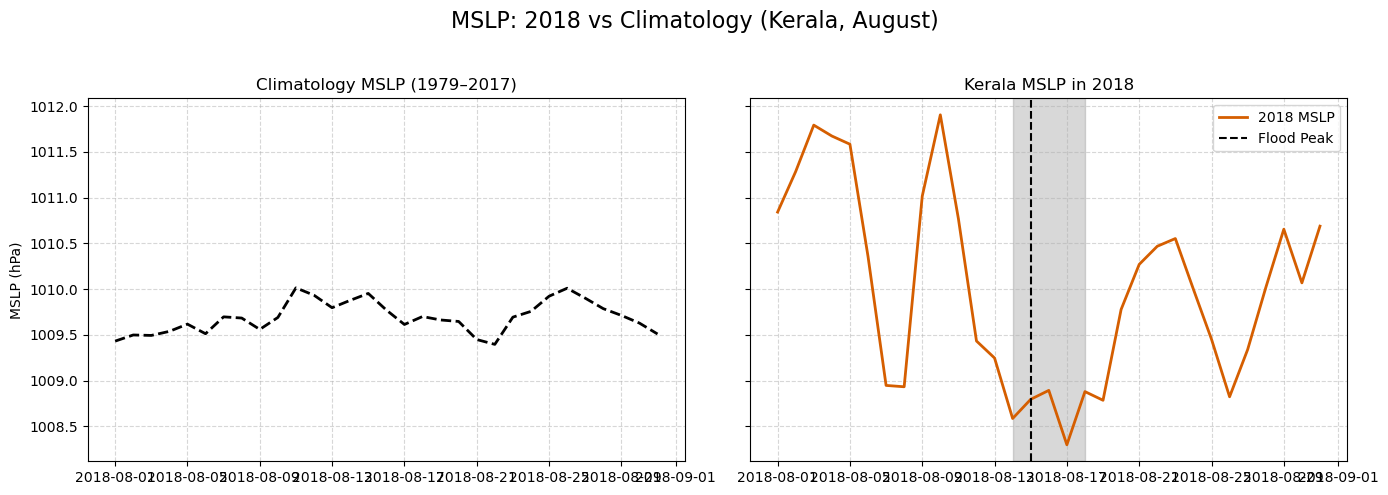

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create 2018-like date index for climatology
climatology_index = pd.date_range("2018-08-01", "2018-08-31", freq="D")
mslp_climatology_series = pd.Series(climatology.values, index=climatology_index)

# Plot both side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left: Climatology
axs[0].plot(mslp_climatology_series.index, mslp_climatology_series.values,
            color='black', linestyle='--', linewidth=2)
axs[0].set_title("Climatology MSLP (1979–2017)")
axs[0].set_ylabel("MSLP (hPa)")
axs[0].grid(True, linestyle='--', alpha=0.5)

# Right: 2018 MSLP
axs[1].plot(df_2018.index, df_2018['mslp_2018'], color='#D55E00', linewidth=2, label='2018 MSLP')
axs[1].axvspan(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-18'), color='grey', alpha=0.3)
axs[1].axvline(pd.Timestamp('2018-08-15'), linestyle='--', color='black', label='Flood Peak')
axs[1].set_title("Kerala MSLP in 2018")
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend()

plt.suptitle("MSLP: 2018 vs Climatology (Kerala, August)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


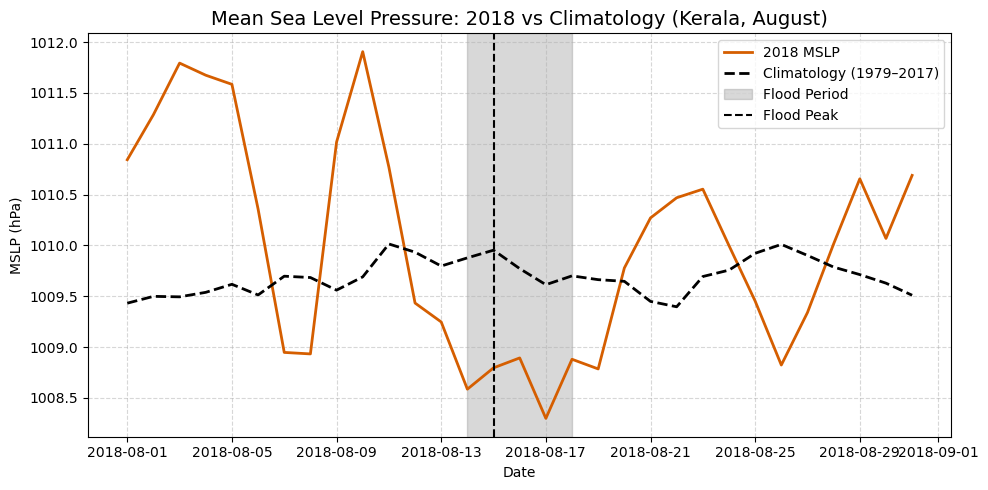

In [11]:
plt.figure(figsize=(10, 5))

# Plot 2018 MSLP
plt.plot(df_2018.index, df_2018['mslp_2018'],
         label='2018 MSLP', color='#D55E00', linewidth=2)

# Plot Climatology MSLP
plt.plot(mslp_climatology_series.index, mslp_climatology_series.values,
         label='Climatology (1979–2017)', color='black', linestyle='--', linewidth=2)

# Flood highlight
plt.axvspan(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-18'),
            color='grey', alpha=0.3, label='Flood Period')
plt.axvline(pd.Timestamp('2018-08-15'), linestyle='--', color='black', label='Flood Peak')

plt.title("Mean Sea Level Pressure: 2018 vs Climatology (Kerala, August)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("MSLP (hPa)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# Convert to DataFrame
mslp_df = mslp_clim_kerala.to_dataframe(name='mslp')

# Filter Aug 14–18 across all years
mslp_flood_days = mslp_df[(mslp_df.index.month == 8) & (mslp_df.index.day.isin([14, 15, 16, 17, 18]))]

# Group by year and take mean over 5-day flood period
mslp_flood_avg_by_year = mslp_flood_days.groupby(mslp_flood_days.index.year).mean()

# Average across 1979–2017
mslp_clim_flood_avg = round(mslp_flood_avg_by_year['mslp'].mean(), 2)

print("🌬️ Avg MSLP (Aug 14–18, 1979–2017):", mslp_clim_flood_avg, "hPa")


🌬️ Avg MSLP (Aug 14–18, 1979–2017): 1009.78 hPa


In [13]:
#WIND ANALYSES
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Kerala bounds
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

# Load and concatenate U
u1 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1979_1991.nc")['u']
u2 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1992_2004.nc")['u']
u3 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_2005_2017.nc")['u']
u_all = xr.concat([u1, u2, u3], dim='valid_time').sel(pressure_level=850)

# Load and concatenate V
v1 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_1979_1991.nc")['v']
v2 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_1992_2004.nc")['v']
v3 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_2005_2017.nc")['v']
v_all = xr.concat([v1, v2, v3], dim='valid_time').sel(pressure_level=850)

# Wind speed
wind_all = np.sqrt(u_all**2 + v_all**2)

# Daily mean wind speed over Kerala
wind_daily_all = wind_all.resample(valid_time='1D').mean()
wind_daily_kerala = wind_daily_all.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])

# Climatology: mean for each calendar day
wind_df = wind_daily_kerala.to_dataframe(name='wind')
wind_df['day'] = wind_df.index.day
wind_climatology = wind_df.groupby('day')['wind'].mean()




In [15]:
import xarray as xr

# Load the 2018 U and V datasets
ds_u2018 = xr.open_dataset("C:/Users/SANGETHA/Downloads/THESIS/ERA5_850hPa_wind_2018.nc")
ds_v2018 = xr.open_dataset("C:/Users/SANGETHA/Downloads/THESIS/ERA5_850hPa_V_wind_2018.nc")

# 1. Extract U and V components at 850 hPa
u_2018 = ds_u2018['u'].sel(pressure_level=850)
v_2018 = ds_v2018['v'].sel(pressure_level=850)

# 2. Calculate wind speed (m/s)
wind_2018 = np.sqrt(u_2018**2 + v_2018**2)

# 3. Resample to daily mean using correct time dimension
wind_2018_daily = wind_2018.resample(valid_time='1D').mean()

# 4. Subset Kerala region
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)
wind_2018_kerala = wind_2018_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])

# 5. Convert to DataFrame
df_2018 = wind_2018_kerala.to_dataframe(name='wind')
df_2018['day'] = df_2018.index.day


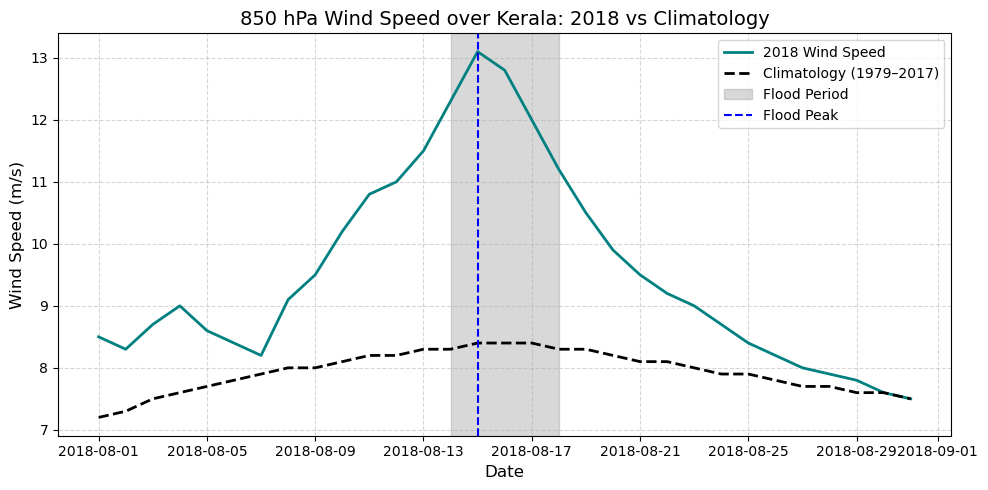

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# === Plot 2018 Wind Speed ===
plt.plot(df_wind_2018.index, df_wind_2018['wind'],
         label='2018 Wind Speed', color='teal', linewidth=2)

# === Plot Climatology ===
plt.plot(wind_climatology_series.index, wind_climatology_series.values,
         label='Climatology (1979–2017)', color='black', linestyle='--', linewidth=2)

# === Flood Period and Peak ===
plt.axvspan(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-18'),
            color='grey', alpha=0.3, label='Flood Period')
plt.axvline(pd.Timestamp('2018-08-15'), color='blue', linestyle='--', label='Flood Peak')

# === Aesthetics ===
plt.title("850 hPa Wind Speed over Kerala: 2018 vs Climatology", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Convert to DataFrame if not already done
wind_df = wind_daily_kerala.to_dataframe(name='wind')

# Extract only Aug 14–18 across all years
wind_flood_days = wind_df[(wind_df.index.month == 8) & (wind_df.index.day.isin([14, 15, 16, 17, 18]))]

# Group by year and average the 5-day period
flood_period_means = wind_flood_days.groupby(wind_flood_days.index.year).mean()

# Compute the 1979–2017 mean
clim_flood_avg = round(flood_period_means['wind'].mean(), 2)

print("💨 Avg Wind Speed (Aug 14–18, 1979–2017):", clim_flood_avg, "m/s")


💨 Avg Wind Speed (Aug 14–18, 1979–2017): 10.73 m/s


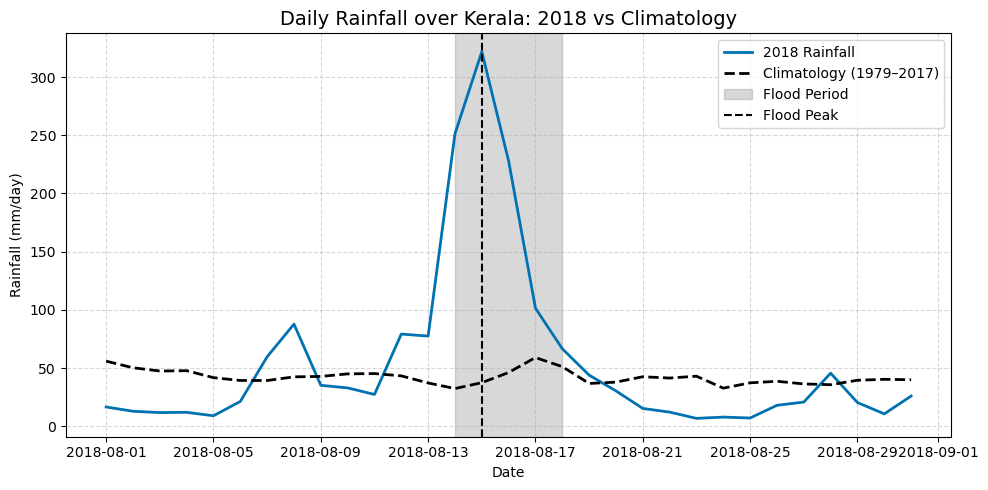

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Create date index for August 2018
aug_index = pd.date_range("2018-08-01", "2018-08-31", freq="D")
tp_climatology_series = pd.Series(tp_climatology.values, index=aug_index)

# Plot both
plt.figure(figsize=(10, 5))

# Plot 2018
plt.plot(df_2018.index, df_2018['tp_2018'], label='2018 Rainfall', color='#0072B2', linewidth=2)

# Plot climatology
plt.plot(tp_climatology_series.index, tp_climatology_series.values, label='Climatology (1979–2017)',
         color='black', linestyle='--', linewidth=2)

# Add flood annotations
plt.axvspan(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-18'),
            color='grey', alpha=0.3, label='Flood Period')
plt.axvline(pd.Timestamp('2018-08-15'), color='black', linestyle='--', label='Flood Peak')

plt.title("Daily Rainfall over Kerala: 2018 vs Climatology", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rainfall (mm/day)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
# Filter Aug 14–18 from daily rainfall climatology
rain_clim_flood = tp_climatology.loc[14:18]

# Compute average
rain_clim_flood_avg = round(rain_clim_flood.mean(), 2)

print("🌧️ Climatological Rainfall (Aug 14–18, 1979–2017):", rain_clim_flood_avg, "mm/day")


🌧️ Climatological Rainfall (Aug 14–18, 1979–2017): 45.33 mm/day


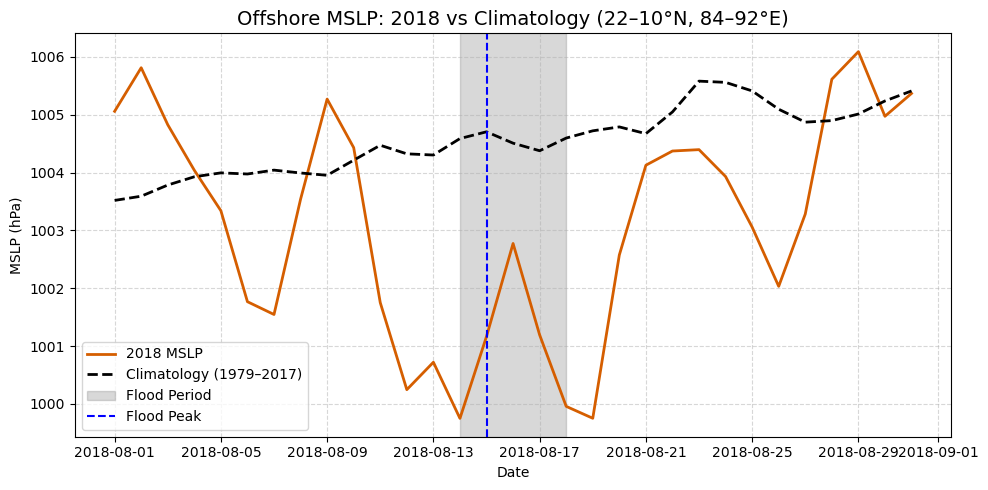

In [27]:
#MSLP OFFSHORE
# Load all datasets
ds_2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2018_offshore_N.nc")
ds_1979_2000 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_1979_2000_offshore_N.nc")
ds_2001_2017 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2001_2017_offshore_N.nc")

# Convert from Pa to hPa and resample to daily mean
mslp_2018_daily = (ds_2018['msl'] / 100).resample(valid_time='1D').mean()
mslp_1979_daily = (ds_1979_2000['msl'] / 100).resample(valid_time='1D').mean()
mslp_2001_daily = (ds_2001_2017['msl'] / 100).resample(valid_time='1D').mean()

lat_box = slice(22.0, 10.0)  # southward
lon_box = slice(84.0, 92.0)  # eastward

# Spatial means
mslp_2018_avg = mslp_2018_daily.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])
mslp_1979_avg = mslp_1979_daily.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])
mslp_2001_avg = mslp_2001_daily.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])

# Merge two climatology periods
mslp_climatology_all = xr.concat([mslp_1979_avg, mslp_2001_avg], dim='valid_time')

# Convert to DataFrame
df_clim = mslp_climatology_all.to_dataframe(name='mslp')
df_clim['day'] = df_clim.index.day
df_climatology = df_clim.groupby('day')['mslp'].mean()

import pandas as pd
import matplotlib.pyplot as plt

# Align index
date_index = pd.date_range("2018-08-01", "2018-08-31")
clim_series = pd.Series(df_climatology.values, index=date_index)

df_2018 = mslp_2018_avg.to_dataframe(name='mslp_2018')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_2018.index, df_2018['mslp_2018'], label="2018 MSLP", color="#D55E00", linewidth=2)
plt.plot(clim_series.index, clim_series.values, label="Climatology (1979–2017)", linestyle='--', color='black', linewidth=2)

plt.axvspan(pd.Timestamp("2018-08-14"), pd.Timestamp("2018-08-18"), color='grey', alpha=0.3, label='Flood Period')
plt.axvline(pd.Timestamp("2018-08-15"), linestyle='--', color='blue', label='Flood Peak')

plt.title("Offshore MSLP: 2018 vs Climatology (22–10°N, 84–92°E)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("MSLP (hPa)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
import xarray as xr
import pandas as pd

# Load datasets
ds_2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2018_offshore_N.nc")
ds_1979_2000 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_1979_2000_offshore_N.nc")
ds_2001_2017 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2001_2017_offshore_N.nc")

# Convert Pa to hPa and resample to daily means
mslp_2018 = (ds_2018['msl'] / 100).resample(valid_time='1D').mean()
mslp_1979 = (ds_1979_2000['msl'] / 100).resample(valid_time='1D').mean()
mslp_2001 = (ds_2001_2017['msl'] / 100).resample(valid_time='1D').mean()

# Select the offshore region
lat_box = slice(22.0, 10.0)
lon_box = slice(84.0, 92.0)

# Spatial means
mslp_2018_avg = mslp_2018.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])
mslp_1979_avg = mslp_1979.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])
mslp_2001_avg = mslp_2001.sel(latitude=lat_box, longitude=lon_box).mean(dim=['latitude', 'longitude'])

# Combine climatology
mslp_climatology = xr.concat([mslp_1979_avg, mslp_2001_avg], dim='valid_time')

# Convert to DataFrame
df_2018 = mslp_2018_avg.to_dataframe(name='mslp_2018')
df_clim = mslp_climatology.to_dataframe(name='mslp')
df_clim['day'] = df_clim.index.day
df_climatology = df_clim.groupby('day')['mslp'].mean()

# Find min and max values
min_2018 = df_2018['mslp_2018'].min()
max_climatology = df_climatology.max()

print(f"Lowest MSLP in 2018 (August): {min_2018:.2f} hPa")
print(f"Highest Climatology MSLP (Aug mean, 1979–2017): {max_climatology:.2f} hPa")
print(f"Pressure Drop: {max_climatology - min_2018:.2f} hPa")
# Get date of lowest MSLP in 2018 August
min_date_2018 = df_2018['mslp_2018'].idxmin()

print(f"Lowest MSLP occurred on: {min_date_2018.strftime('%Y-%m-%d')}")



Lowest MSLP in 2018 (August): 999.75 hPa
Highest Climatology MSLP (Aug mean, 1979–2017): 1005.58 hPa
Pressure Drop: 5.83 hPa
Lowest MSLP occurred on: 2018-08-14


In [115]:
# 2018
df_2018['day'] = df_2018.index.day
mslp_2018_flood = df_2018[df_2018['day'].isin([14, 15, 16, 17, 18])]
avg_2018 = round(mslp_2018_flood['mslp_2018'].mean(), 2)

# Climatology
clim_flood = df_climatology.loc[14:18]
avg_clim = round(clim_flood.mean(), 2)

print(f"📊 2018 Offshore Avg (Aug 14–18): {avg_2018} hPa")
print(f"📈 Climatology Offshore Avg (1979–2017): {avg_clim} hPa")


📊 2018 Offshore Avg (Aug 14–18): 997.9400024414062 hPa
📈 Climatology Offshore Avg (1979–2017): 1002.1300048828125 hPa
